In [1]:
# Connect to covid_data database
import mysql.connector

covid_db = mysql.connector.connect(
    host="localhost",
    user="covidAnalyst",
    passwd="P@ssw0rd",
    auth_plugin='mysql_native_password',
    database="covid_data",
    allow_local_infile=True
)

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
selectCursor = covid_db.cursor()
states = []
sqlQuery = "select distinct(Province_State) from covid_USA_State where Country_Region=\"US\";"
selectCursor.execute(sqlQuery)
myresult = selectCursor.fetchall()
for state in myresult:
    states.append(state[0])
selectCursor.close()

True

In [4]:
len(states)

58

In [5]:
def cummulative_case_visualization(state):
    selectCursor = covid_db.cursor()
    sqlQuery = "select Confirmed from covid_USA_State WHERE Province_State=\"" + state + "\" order by Last_Update;"
    selectCursor.execute(sqlQuery)
    myresult = selectCursor.fetchall()
    selectCursor.close()
    transformed_result = []
    for x in myresult:
        transformed_result.append(x[0])
    pd.DataFrame(transformed_result).plot(kind="bar")
    return

In [1]:
def daily_case_visualization(state):
    selectCursor = covid_db.cursor()
    sqlQuery = "select Confirmed from covid_USA_State WHERE Province_State=\"" + state + "\" order by Last_Update;"
    selectCursor.execute(sqlQuery)
    myresult = selectCursor.fetchall()
    selectCursor.close()
    transformed_result = []
    for x in myresult:
        transformed_result.append(x[0])
    daily_cases = []
    for i in range(len(transformed_result) - 1):
        daily_case = transformed_result[i+1] - transformed_result[i]
        daily_cases.append(daily_case)
    daily_cases_df = pd.DataFrame(daily_cases)
    rolling_mean = daily_cases_df.rolling(window=5).mean()
    daily_cases_df.plot(kind="bar", label='Daily Cases', legend=True)
    plt.plot(rolling_mean, color='orange', linewidth=3, label=state)
    plt.legend()
    return

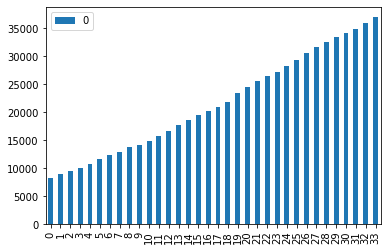

In [11]:
state = "Maryland"
cummulative_case_visualization(state)

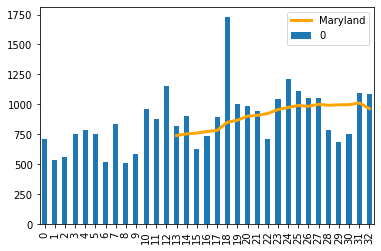

In [12]:
daily_case_visualization(state)

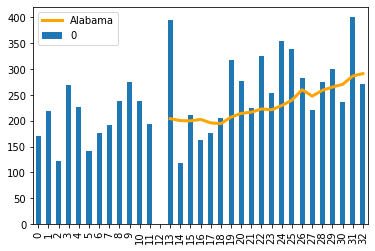

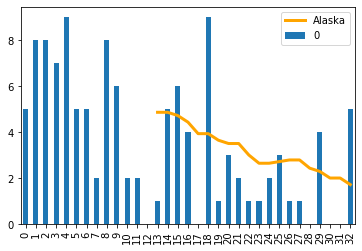

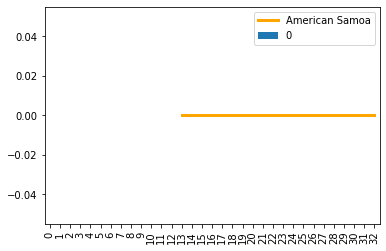

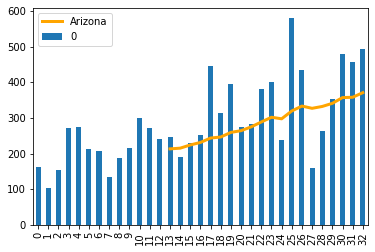

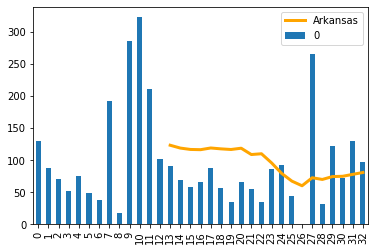

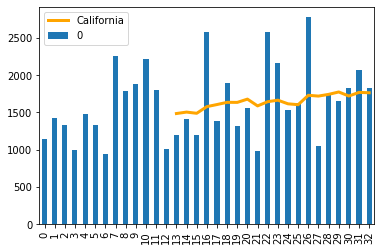

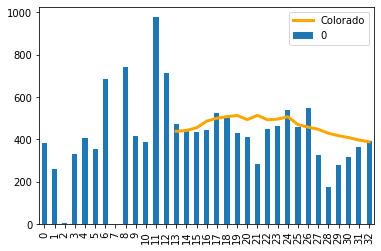

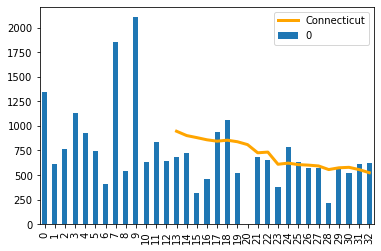

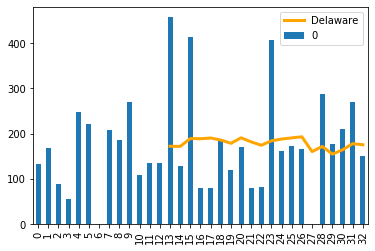

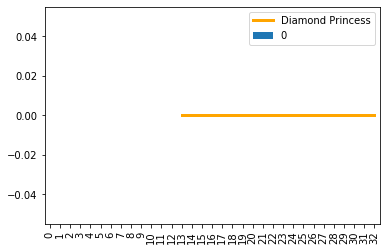

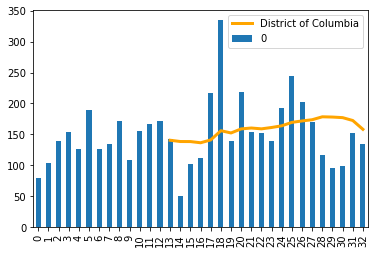

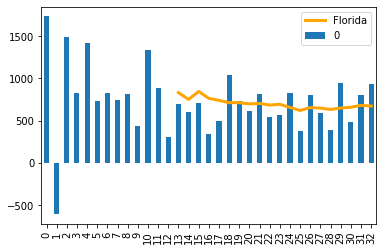

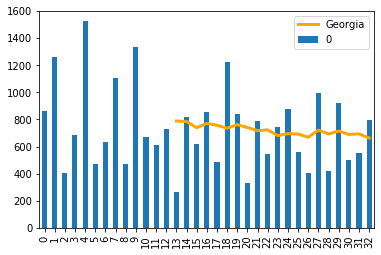

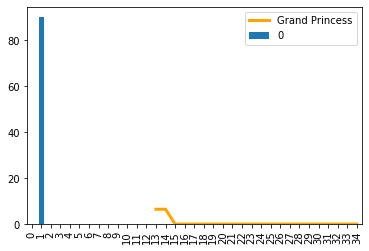

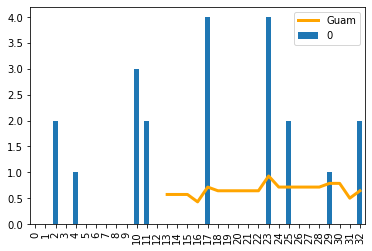

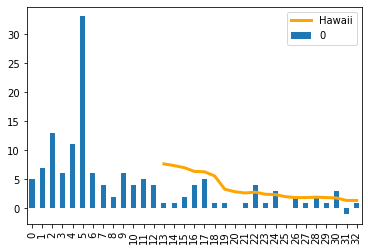

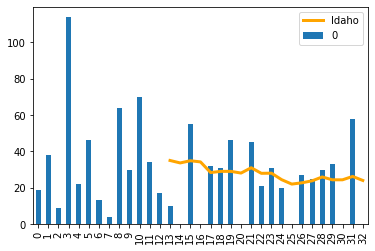

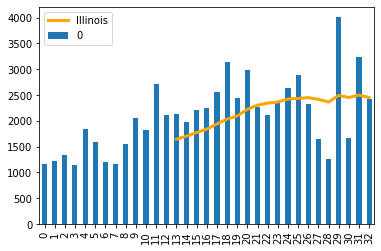

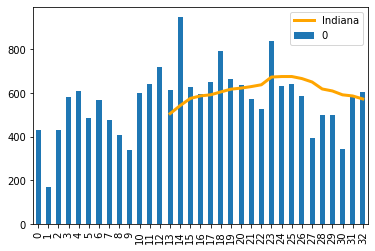

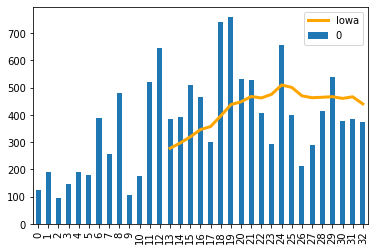

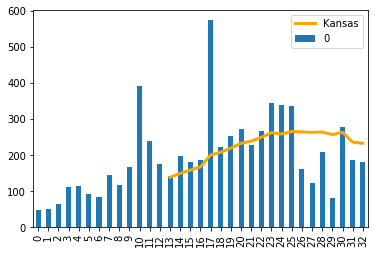

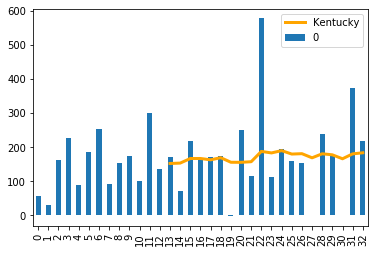

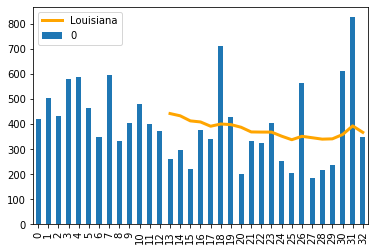

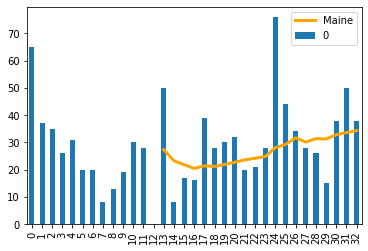

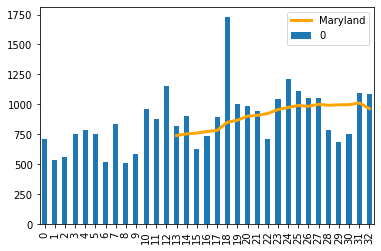

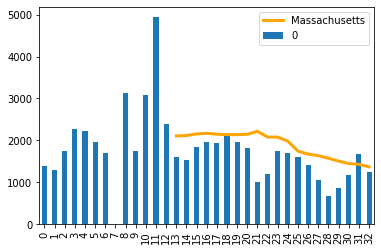

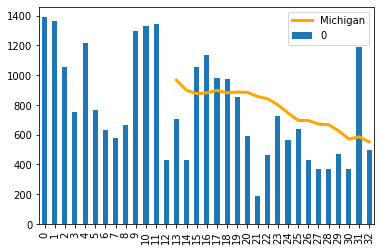

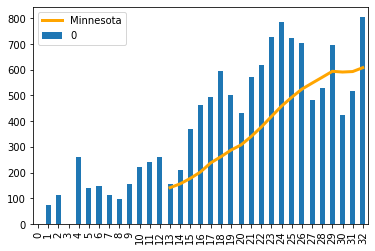

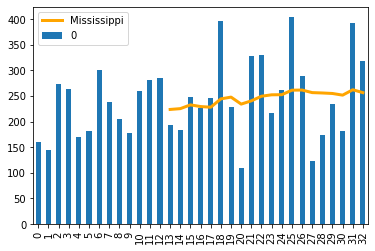

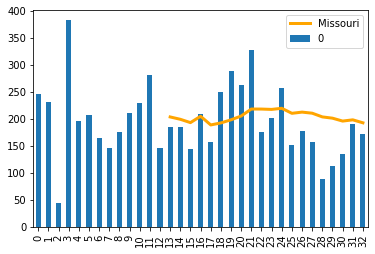

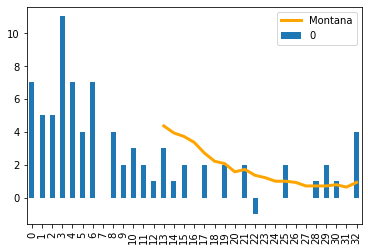

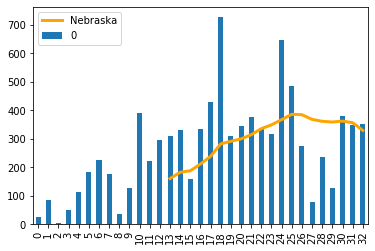

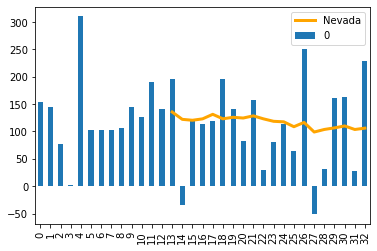

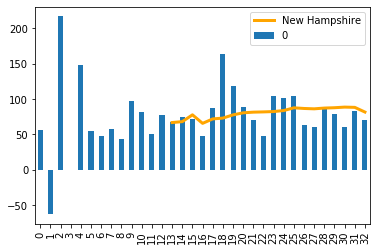

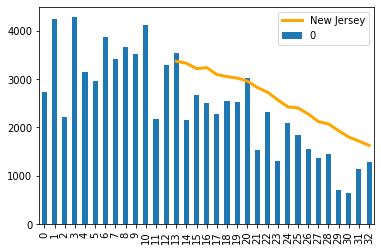

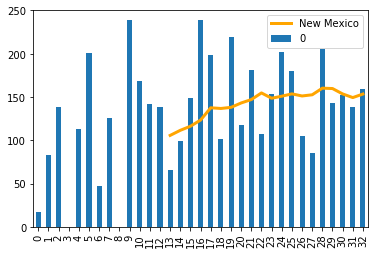

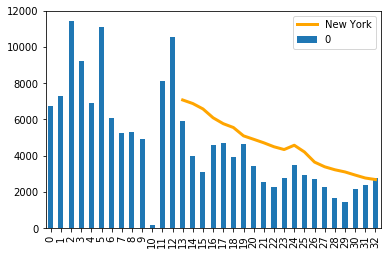

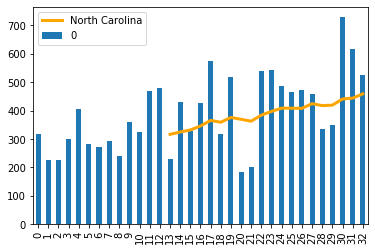

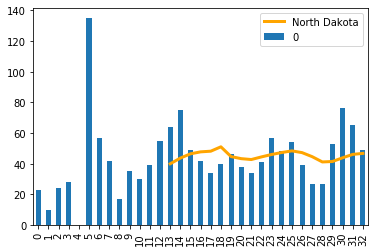

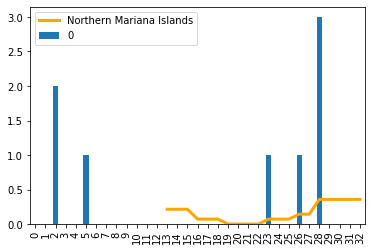

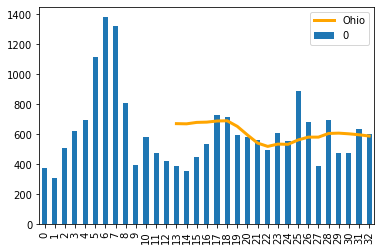

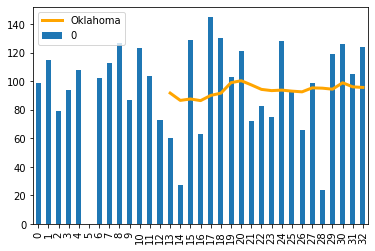

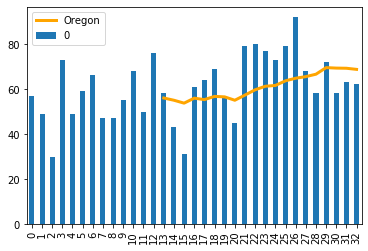

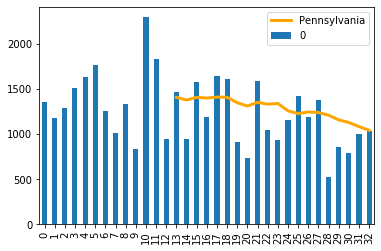

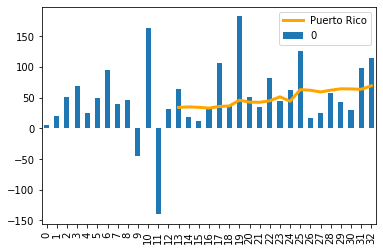

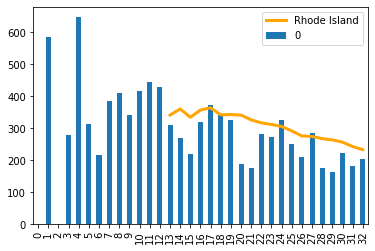

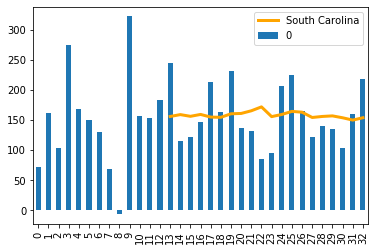

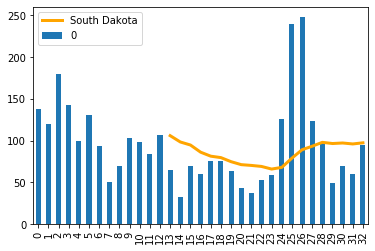

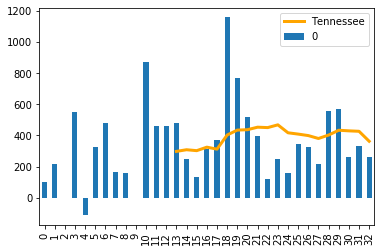

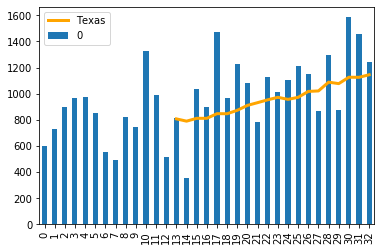

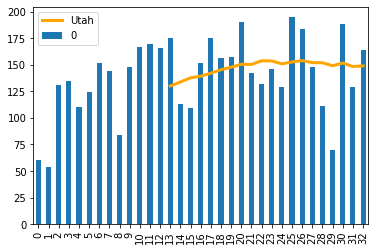

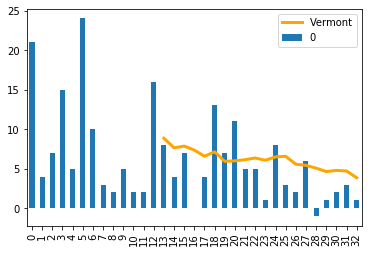

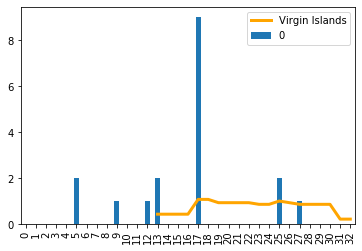

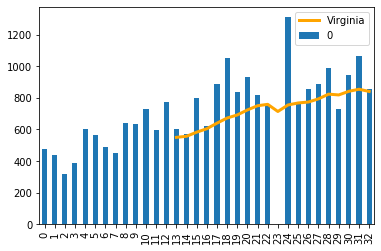

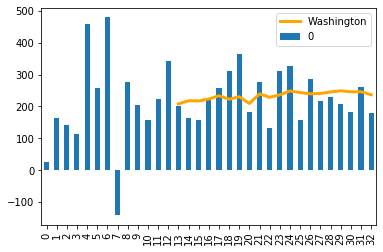

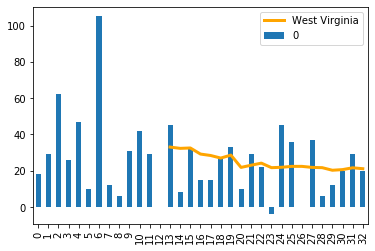

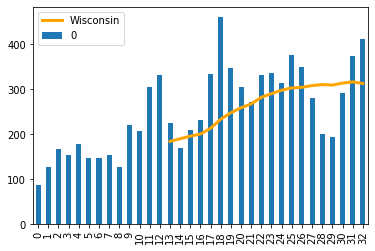

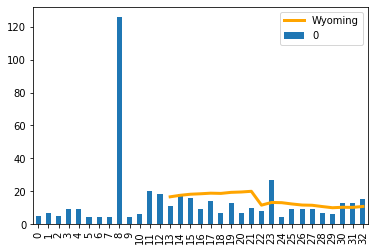

In [13]:
for state in states:
    daily_case_visualization(state)